In [6]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

In [7]:
backend = FakeManilaV2()
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

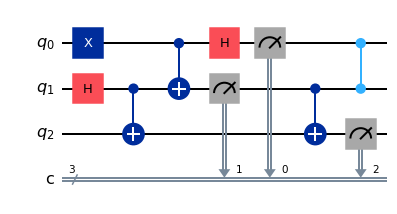

In [8]:
qc = QuantumCircuit(3, 3)

qc.x(0)
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.cx(1, 2)
qc.cz(1, 0)
qc.measure(2, 2)

qc.draw(output='mpl')

In [9]:
isa_circuit = pm.run(qc)
job = sampler.run([isa_circuit])
result = job.result()
pub_result = result[0]

/home/henning/.local/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


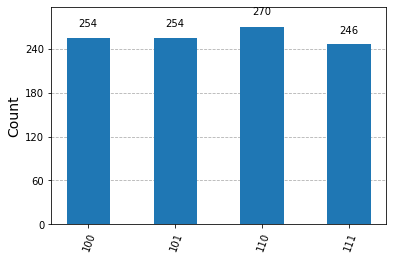

In [10]:
plot_histogram(pub_result.data.c.get_counts())